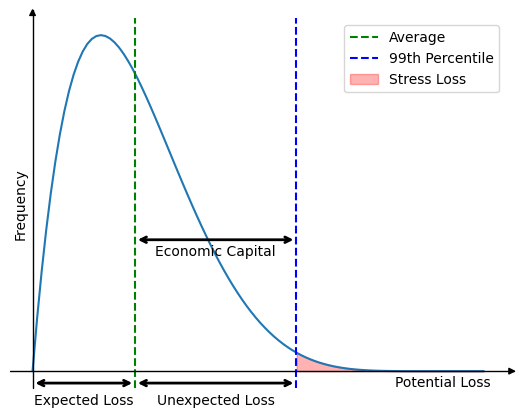

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta
from mpl_toolkits.axisartist.axislines import SubplotZero

# Parameters
alpha = 2
beta_param = 6
x = np.linspace(0, 1.1, 100)

# Beta distribution
y = beta.pdf(x, alpha, beta_param)

# Mean and 95th percentile
mean_value = beta.mean(alpha, beta_param)
percentile_95 = beta.ppf(0.95, alpha, beta_param)
percentile_99 = beta.ppf(0.99, alpha, beta_param)

fig = plt.figure()
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)
    
ax.plot(x, y) #, label=r'$\mathrm{Beta}(2, 5)$')
ax.axvline(x=mean_value, color='g', linestyle='--', label='Average')
#ax.axvline(x=percentile_95, color='g', linestyle='--', label='95th Percentile')
ax.axvline(x=percentile_99, color='b', linestyle='--', label='99th Percentile')

# Fill stress loss area
ax.fill_between(x, 0, y, where=(x > percentile_99), color='red', alpha=0.3, label='Stress Loss')

# Brace between 0 and average
ax.annotate('', xy=(0, -0.1), xytext=(mean_value, -0.1),
             arrowprops=dict(arrowstyle='<->', lw=2))

# Brace between average and 95th percentile
ax.annotate('', xy=(mean_value, -0.1), xytext=(percentile_99, -0.1),
             arrowprops=dict(arrowstyle='<->', lw=2))

# Brace between average and 95th percentile
ax.annotate('', xy=(mean_value, +1.1), xytext=(percentile_99, +1.1),
             arrowprops=dict(arrowstyle='<->', lw=2))

# Annotation for the Expected Loss
ax.text(mean_value / 2, -0.25, 'Expected Loss', ha='center', va='center')
ax.text((mean_value + percentile_99) / 2, -0.25, 'Unexpected Loss', ha='center', va='center')
ax.text((mean_value + percentile_99) / 2, +1.00, 'Economic Capital', ha='center', va='center')

# Axis labels
ax.text(1, -0.1, 'Potential Loss', ha='center', va='center')
ax.text(-0.03, 1.4, 'Frequency', ha='center', va='center', rotation='vertical')

# Hide ticks
ax.set_xticks([])
ax.set_yticks([])
ax.tick_params(axis='both', which='both', length=0)

# Show legend
ax.legend(loc='upper right')

# Save the plot to a PDF file
plt.savefig('plots/loss_distribution_with_stress_loss.pdf', format='pdf', bbox_inches='tight')

plt.show()

## Distribution of annual default rates

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Function to generate default rates
def generate_default_rates(common_default_probability, correlation, n_companies, n_simulations=10000):
    mean = np.zeros(n_companies)
    cov = correlation * np.ones((n_companies, n_companies)) + (1 - correlation) * np.eye(n_companies)
    defaults = np.random.multivariate_normal(mean, cov, n_simulations) < norm.ppf(common_default_probability)
    default_rates = defaults.mean(axis=1)
    return default_rates

In [3]:
# Parameters
common_default_probability = 0.20
n_companies = 1000
correlations = [0.0, 0.2, 0.5, 0.9]
np.random.seed(564)

# Generate data
default_rates = {}
for correlation in correlations:
    default_rates[correlation] = generate_default_rates(common_default_probability, correlation, n_companies, n_simulations=100000)

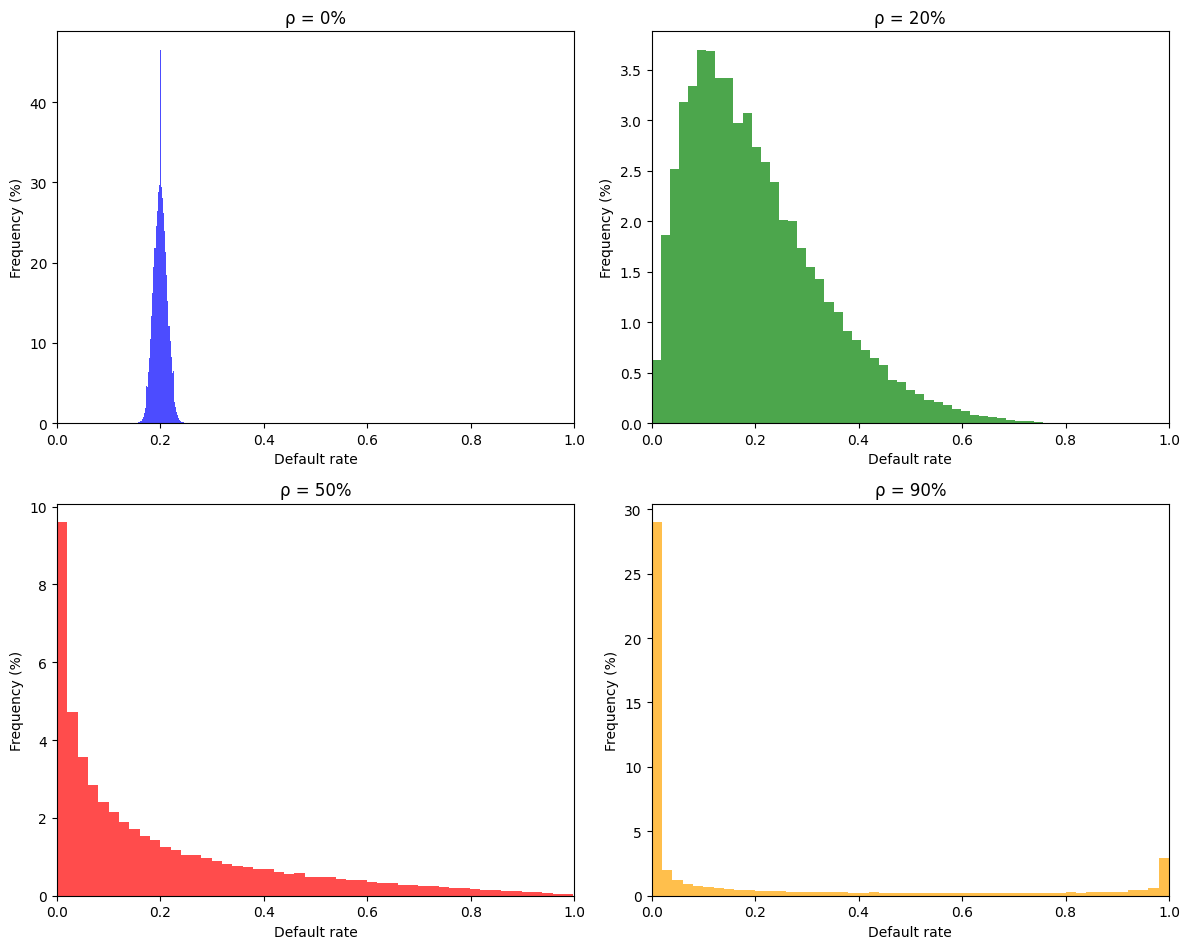

In [4]:
# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for i, correlation in enumerate(correlations):
    axs[i].hist(default_rates[correlation], bins=50, density=True, alpha=0.7, color = ['blue', 'green', 'red', 'orange'][i])
    axs[i].set_title(f'ρ = {int(correlation*100)}%')
    axs[i].set_xlabel('Default rate')
    axs[i].set_xlim(0, 1)
    axs[i].set_ylabel('Frequency (%)')
    axs[i].set_ylim(0, None)

#fig.suptitle('Distribution of annual default rates', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('plots\default_rates_distribution.pdf', format='pdf', bbox_inches='tight')

# Show plot
plt.show()